In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
from PIL import Image

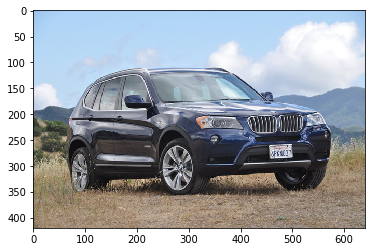

In [2]:
image1 = Image.open('../Capstone 2 Stanford Car Classification/car_data/train/BMW X3 SUV 2012/04018.jpg')
imgplot = plt.imshow(image1)
plt.show()

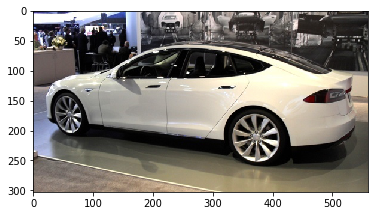

In [3]:
image2 = Image.open('../Capstone 2 Stanford Car Classification/car_data/train/Tesla Model S Sedan 2012/05982.jpg')
imgplot = plt.imshow(image2)
plt.show()

In [4]:
car_df = pd.read_csv('clean_train_data.csv', index_col= 0)
car_df.head()

,file,model_name,class,BBOX_x1,BBOX_y1,BBOX_x2,BBOX_y2,BBOX_h,BBOX_w,year,make,model,type
0,00001.jpg,Audi TTS Coupe 2012,14,39,116,569,375,260,531,2012,Audi,TTS,Coupe
1,00002.jpg,Acura TL Sedan 2012,3,36,116,868,587,472,833,2012,Acura,TL,Sedan
2,00003.jpg,Dodge Dakota Club Cab 2007,91,85,109,601,381,273,517,2007,Dodge,Dakota,Cab
3,00004.jpg,Hyundai Sonata Hybrid Sedan 2012,134,621,393,1484,1096,704,864,2012,Hyundai,Sonata,Sedan
4,00005.jpg,Ford F-450 Super Duty Crew Cab 2012,106,14,36,133,99,64,120,2012,Ford,F-450,Cab


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8144 entries, 0 to 8143
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file        8144 non-null   object
 1   model_name  8144 non-null   object
 2   class       8144 non-null   int64 
 3   BBOX_x1     8144 non-null   int64 
 4   BBOX_y1     8144 non-null   int64 
 5   BBOX_x2     8144 non-null   int64 
 6   BBOX_y2     8144 non-null   int64 
 7   BBOX_h      8144 non-null   int64 
 8   BBOX_w      8144 non-null   int64 
 9   year        8144 non-null   int64 
 10  make        8144 non-null   object
 11  model       8144 non-null   object
 12  type        8144 non-null   object
dtypes: int64(8), object(5)
memory usage: 890.8+ KB


In [6]:
car_df.describe()

,class,BBOX_x1,BBOX_y1,BBOX_x2,BBOX_y2,BBOX_h,BBOX_w,year
count,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000
mean,98.979371,64.906803,108.661223,638.208620,416.431606,308.770383,574.301817,2009.559921
std,56.503148,82.198684,104.551635,410.776734,273.786000,213.463238,375.675050,4.435031
min,1.000000,1.000000,1.000000,76.000000,47.000000,24.000000,74.000000,1991.000000
25%,50.000000,19.000000,42.000000,392.000000,248.000000,174.000000,339.000000,2008.000000
50%,99.000000,39.000000,80.000000,569.000000,360.000000,261.000000,505.000000,2012.000000
75%,148.000000,79.000000,138.250000,746.250000,477.000000,371.000000,660.000000,2012.000000
max,196.000000,1648.000000,1508.000000,5205.000000,3389.000000,2649.000000,4157.000000,2012.000000


In [7]:
makes = car_df['make'].value_counts()
makes[:5]

Chevrolet    905
Dodge        630
Audi         589
BMW          531
Ford         521
Name: make, dtype: int64

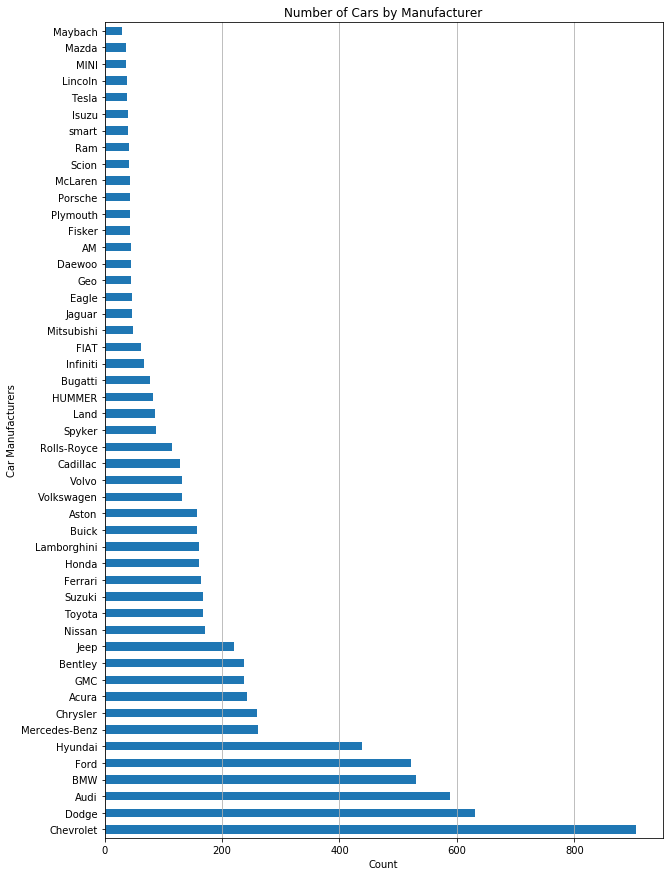

In [8]:
_ = plt.figure(figsize=(10,15))
_ = makes.plot.barh()
_ = plt.title('Number of Cars by Manufacturer')
_ = plt.xlabel('Count')
_ = plt.ylabel('Car Manufacturers')
_ = plt.grid(which= 'major', axis= 'x')
_ = plt.show()

In [9]:
types = car_df['type'].value_counts()
types[:5]

Sedan          1907
SUV            1437
Coupe          1054
Convertible    1036
Cab             719
Name: type, dtype: int64

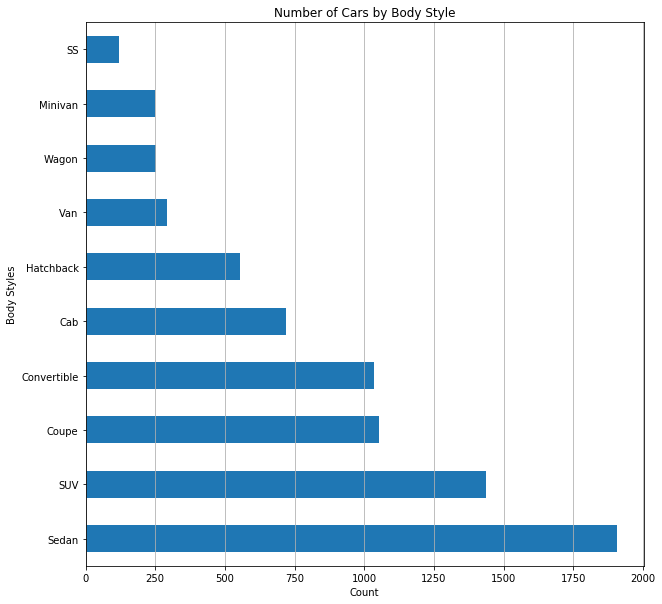

In [10]:
_ = plt.figure(figsize=(10,10))
_ = types[:10].plot.barh()
_ = plt.title('Number of Cars by Body Style')
_ = plt.xlabel('Count')
_ = plt.ylabel('Body Styles')
_ = plt.grid(which= 'major', axis= 'x')
_ = plt.show()

In [11]:
years = car_df['year'].value_counts()
years[:5]

2012    4818
2007    1059
2009     540
2010     413
2011     312
Name: year, dtype: int64

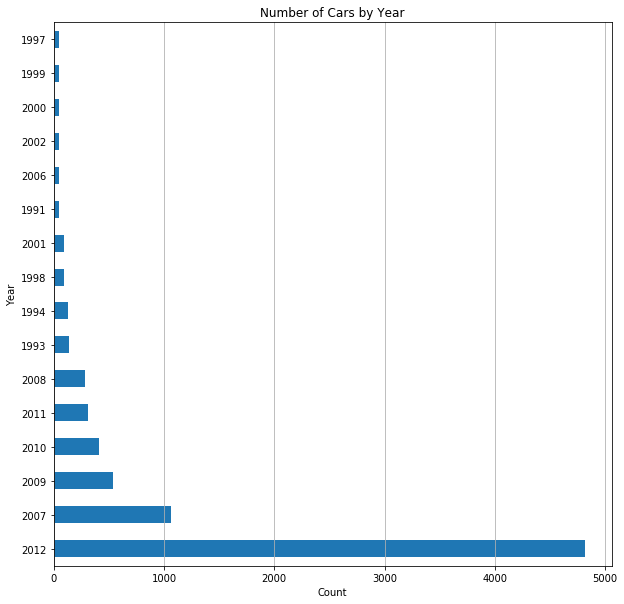

In [12]:
_ = plt.figure(figsize=(10,10))
_ = years.plot.barh()
_ = plt.title('Number of Cars by Year')
_ = plt.xlabel('Count')
_ = plt.ylabel('Year')
_ = plt.grid(which= 'major', axis= 'x')
_ = plt.show()

In [13]:
models = car_df['model_name'].value_counts()
models[:5]

GMC Savana Van 2012                         68
Chrysler 300 SRT-8 2010                     49
Mercedes-Benz 300-Class Convertible 1993    48
Mitsubishi Lancer Sedan 2012                48
Jaguar XK XKR 2012                          47
Name: model_name, dtype: int64

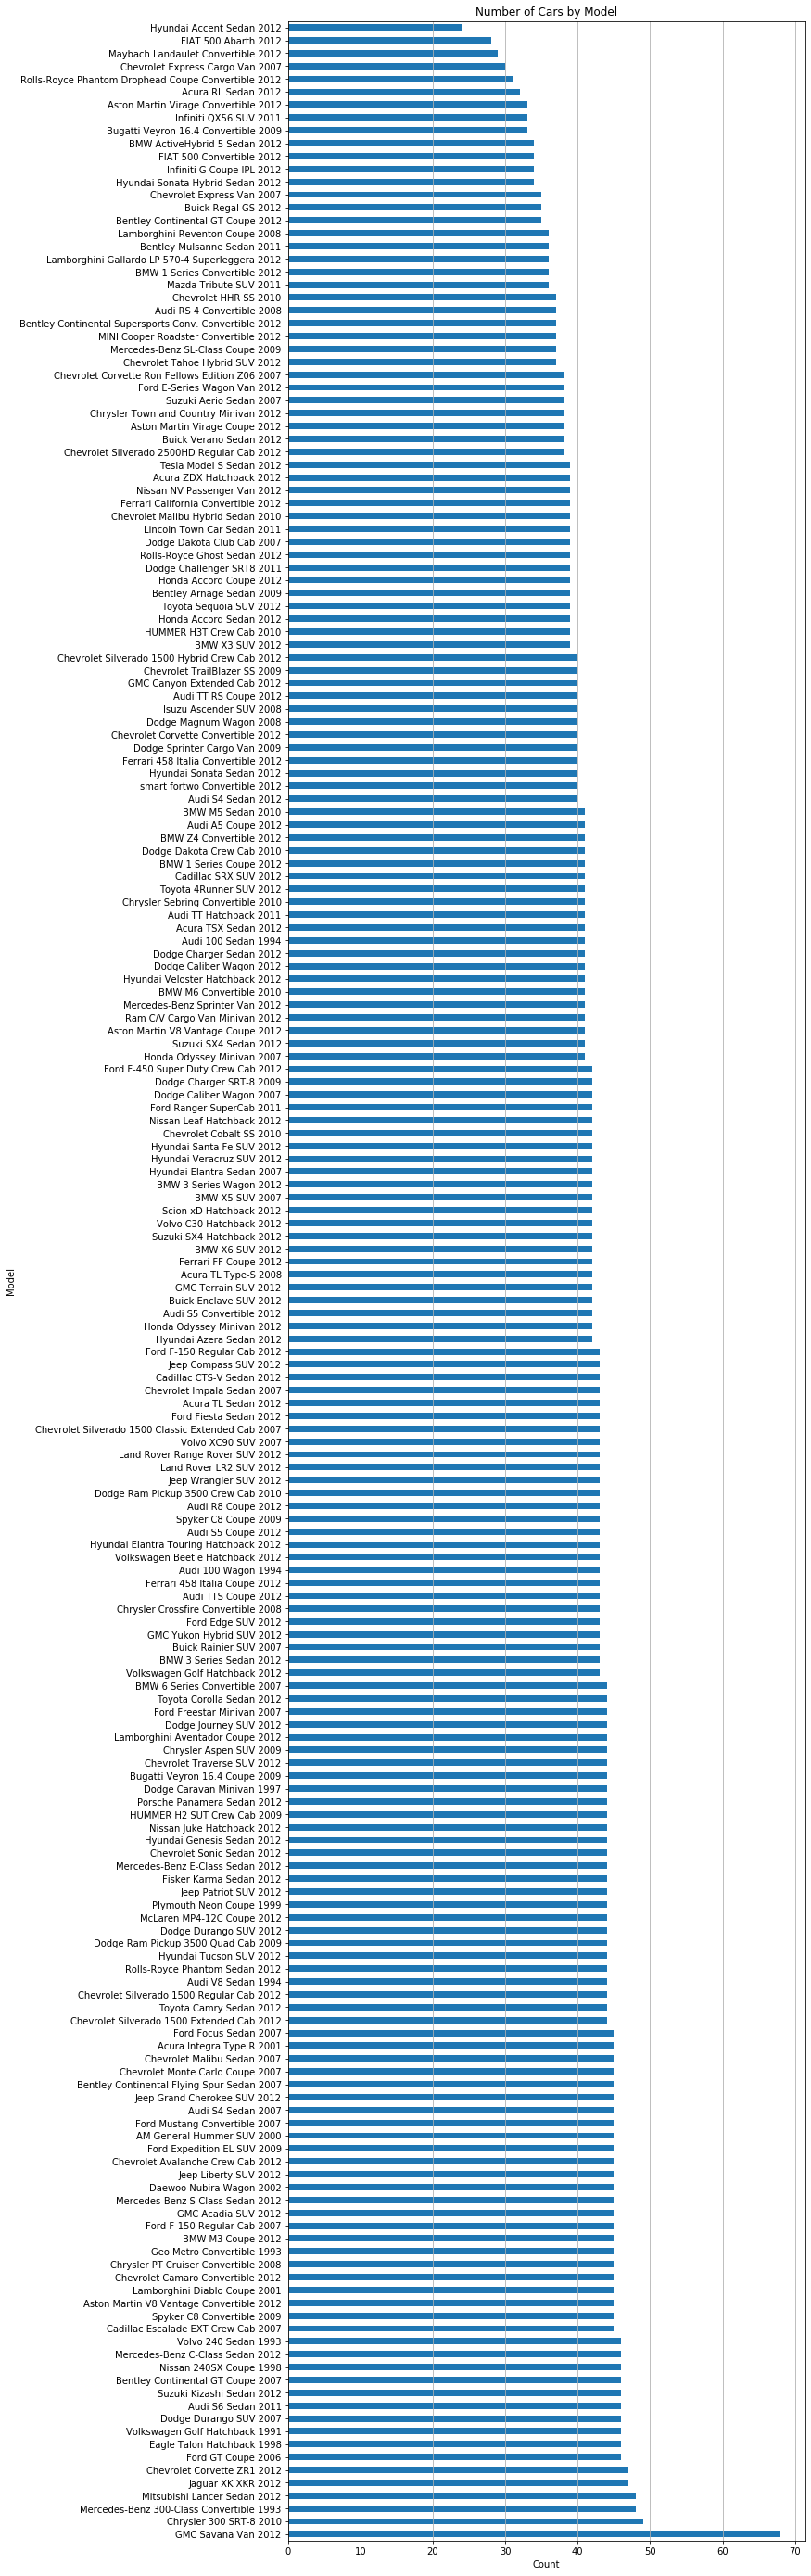

In [14]:
_ = plt.figure(figsize=(10,50))
_ = models.plot.barh()
_ = plt.title('Number of Cars by Model')
_ = plt.xlabel('Count')
_ = plt.ylabel('Model')
_ = plt.grid(which= 'major', axis= 'x')
_ = plt.show()

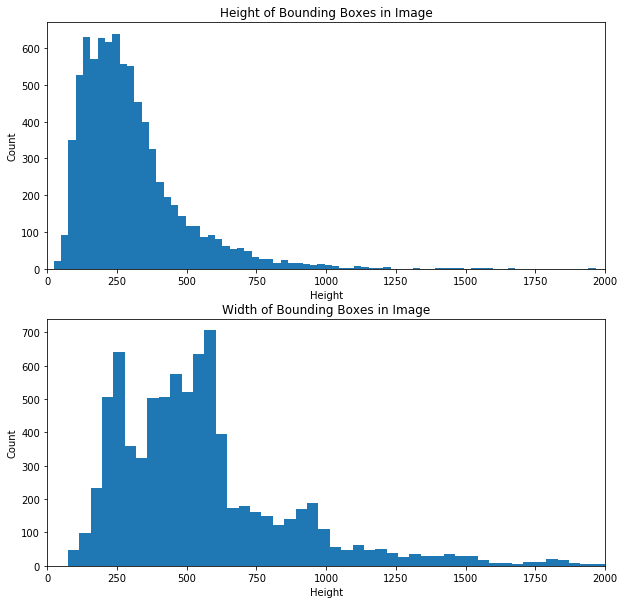

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.hist(car_df.BBOX_h, 100)
ax1.set_title('Height of Bounding Boxes in Image')
ax1.set_xlabel('Height')
ax1.set_ylabel('Count')
ax1.set_xlim(0,2000)
ax2.hist(car_df.BBOX_w, 100)
ax2.set_title('Width of Bounding Boxes in Image')
ax2.set_xlabel('Height')
ax2.set_ylabel('Count')
ax2.set_xlim(0, 2000)
fig.set_size_inches(10, 10)
plt.show()